# IPL Auction Price Prediction using Multiple Linear Regression    

This project aims at predicting the Sold Price (Auction price) of IPL players using Multiple linear regression model using both statistical modelling and model from Scikit learn library

The players data is taken from espn.com website 

o	Implemented OLS model from statistical modelling to predict the auction price of IPL players. Performed residual analysis.
o	Checked for multi-collinearity of features new model is built with statistically significant variables

o	Trained multiple linear regression model in python to predict the auction price of IPL players and improved the model using advanced regression techniques i.e., ridge and lasso with optimal regularization parameter values.

# Ordinary Least Squares(OLS) model from Statistical Modelling# 

In [1]:
#importing useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
#Loading the data and information about the data

df=pd.read_excel('IPL_Auction_Price_data.xlsx')
df=df.set_index('PLAYER NAME')
df.info()
df.iloc[0:5,:]


<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, Abdulla, YA to Zoysa, DNT
Data columns (total 25 columns):
Sl.NO.           130 non-null int64
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE       130 non-null int64
SO

,Sl.NO.,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
PLAYER NAME,,,,,,,,,,,,,,,,,,,,,
"Abdulla, YA",1,2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
Abdur Razzak,2,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
"Agarkar, AB",3,2,IND,KKR,Bowler,571,58,1269,80.62,288,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
"Ashwin, R",4,1,IND,CSK,Bowler,284,31,241,84.56,51,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
"Badrinath, S",5,2,IND,CSK,Batsman,63,0,79,45.93,0,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
#Remove the features that are not useful such as S.No,Team,Auction year,base price:

X_features=['AGE', 'COUNTRY', 'PLAYING ROLE','T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
'AVE-BL', 'ECON', 'SR-BL']

In [4]:
#Converting categorical variables to dummies
#n categorical variables require n-1 dummies as one will go into constant term of the regression

categorical_features=['AGE', 'COUNTRY', 'PLAYING ROLE','CAPTAINCY EXP']
df_updated=pd.get_dummies(df[X_features],columns = categorical_features,drop_first = True)
df_updated.iloc[0:1,:]

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
PLAYER NAME,,,,,,,,,,,,,,,,,,,,,
"Abdulla, YA",0,0,0,0.0,0,0.0,0,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
#Outlier Analysis using Z-score value::
#numer_features=['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B','ODI-WKTS', 'ODI-SR-BL', 'RUNS-S','HS', 'AVE', 'SR-B', 'SIXERS', 
                #'RUNS-C', 'WKTS','AVE-BL', 'ECON', 'SR-BL']
#z_score_df=(df[numer_features]-df[numer_features].mean())/df[numer_features].std()

#z_score_df[z_score_df[::]<3].fillna(z_score_df.mean())

In [6]:
import statsmodels.api as sm
X_features=df_updated.columns
X_features
X=sm.add_constant(df_updated)
y=df['SOLD PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80,random_state =42)
model_1=sm.OLS(y_train,X_train).fit()
model_1.summary2()

#Check for p-value for statistically significant variables
#if p-value <0.05 then the feature is statistically significant---Hypothesis testing
#Check for multi collinearity---VIF and Heatmap are the ways to check this
#VIF >4 means the feature is dependent on other typically all features must have VIF<4
#removing one of the dependent variable depends on understanding of the data and domain.
#prob(F-statistic)<0.05 means model is statistically significant


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2021-01-08 20:43        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [7]:
#VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
def fun_vif_factors(X):
    X_matrix=X.as_matrix()
    vif=[variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['column']=X.columns
    vif_factors['VIF']=vif
    return vif_factors
vif=fun_vif_factors(X[X_features])
vif


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


Text(0.5, 1.0, 'Correlation Matrix between features')

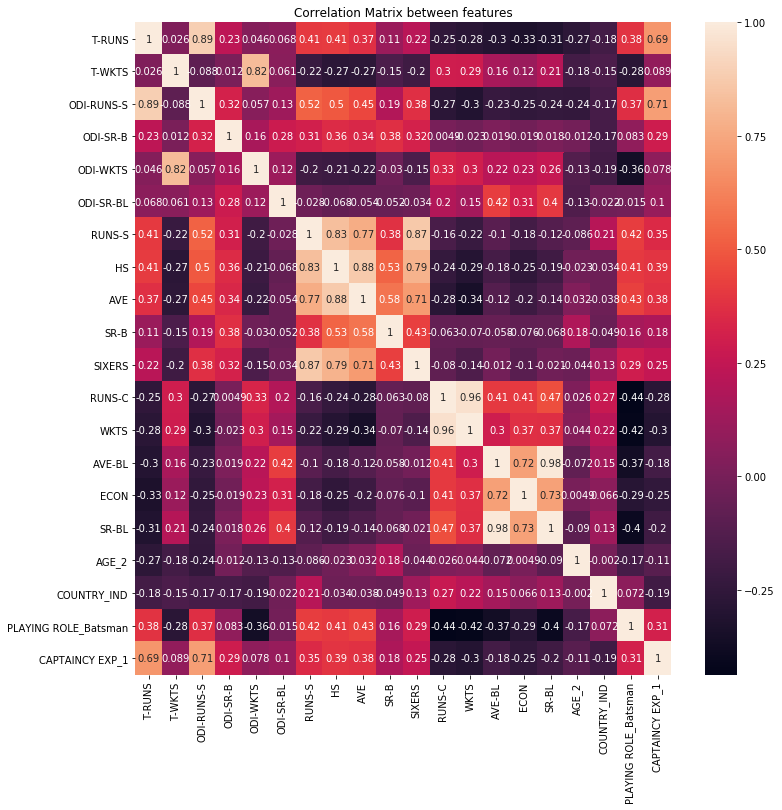

In [8]:
features_with_large_vif=vif[vif.VIF>4].column
import seaborn as sn
plt.figure(figsize = (12,12))
sn.heatmap(X[features_with_large_vif].corr(),annot=True)
plt.title('Correlation Matrix between features')
#T-Runs and ODI-runs are highly correalted
#T-Wkts and ODI-wkts are highly correlated
#Runs and HS and Avg and sixers are highly correlated

In [9]:
#One out 2 of the highly correlated features are removed from the list
features_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S','HS', 'AVE','RUNS-C', 'SR-B', 'AVE-BL', 'ECON',
'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']
X_new_features=list(set(X_features)-set(features_to_be_removed))
vif_new=fun_vif_factors(X[X_new_features])
print(vif_new)
#Check for all features have VIF<4

                    column       VIF
0               COUNTRY_NZ  1.173418
1      PLAYING ROLE_Bowler  3.060168
2                ODI-SR-BL  2.822148
3              COUNTRY_ENG  1.131869
4   PLAYING ROLE_W. Keeper  1.900941
5               COUNTRY_SA  1.416657
6          CAPTAINCY EXP_1  2.458745
7                    AGE_3  1.779861
8                 ODI-WKTS  2.742889
9     PLAYING ROLE_Batsman  2.680207
10             COUNTRY_IND  3.144668
11              COUNTRY_SL  1.519752
12             COUNTRY_BAN  1.094293
13             COUNTRY_PAK  1.334773
14              COUNTRY_WI  1.194093
15             COUNTRY_ZIM  1.205305
16                    WKTS  2.883101
17                  SIXERS  2.397409


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [10]:
#Building new model with the above features without multi collinearity
X_train_new=X_train[X_new_features]
IPL_MLR_model=sm.OLS(y_train,X_train_new).fit()
IPL_MLR_model.summary2()
#Check the p-value for significant features:
#CAPTAINCY EXP_1
#SIXERS
#COUNTRY_ENG
#COUNTRY_IND have p-value<0.05


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2021-01-08 20:43   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [11]:
#Build the model with the statistically significant nfeatures
significant_features=['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']
X_train_=X_train[significant_features]
IPL_model=sm.OLS(y_train,X_train_).fit()
IPL_model.summary2()
#all the features are statistically significant
#prob(f-Statistic)<0.05 -->overall model is significant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2021-01-08 20:43 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

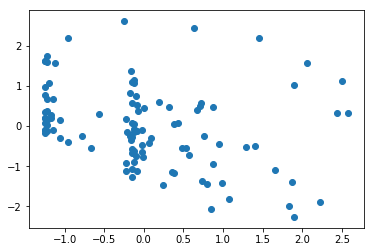

In [12]:
#Check for Homoscadasticity the variance of the error must be constant over independent variable
#If there is heteroscedasticity (non-constant variance of residuals), then a funnel type shape in the residual plot 
#can be expected
y_pred=(IPL_model.predict(X_train_))
residues=((y_train)-y_pred)

#Standardizing the values
def get_standrd(values):
    return (values-values.mean())/values.std()
y_pred_stand=get_standrd(y_pred)
residues_stand=get_standrd(residues)
plt.scatter(y_pred_stand,residues_stand)

#The plot is random and has no any pattern hence residues are Homoscadastic

(array([ 3.,  2.,  5.,  7.,  7., 13., 16., 16., 12.,  6.,  6.,  6.,  1.,
         2.,  2.]),
 array([-710404.57375336, -596654.34960017, -482904.12544698,
        -369153.90129379, -255403.6771406 , -141653.45298741,
         -27903.22883422,   85846.99531897,  199597.21947216,
         313347.44362535,  427097.66777854,  540847.89193172,
         654598.11608491,  768348.3402381 ,  882098.56439129,
         995848.78854448]),
 <a list of 15 Patch objects>)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


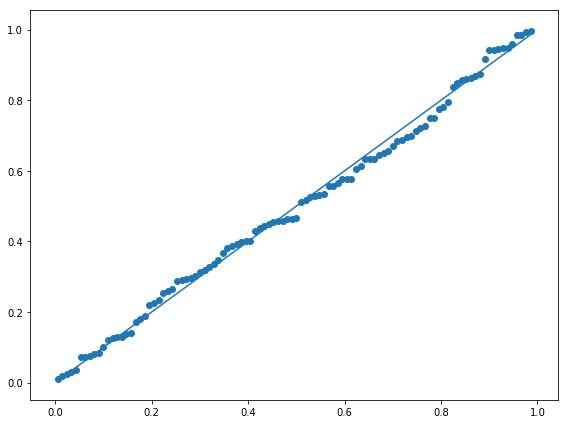

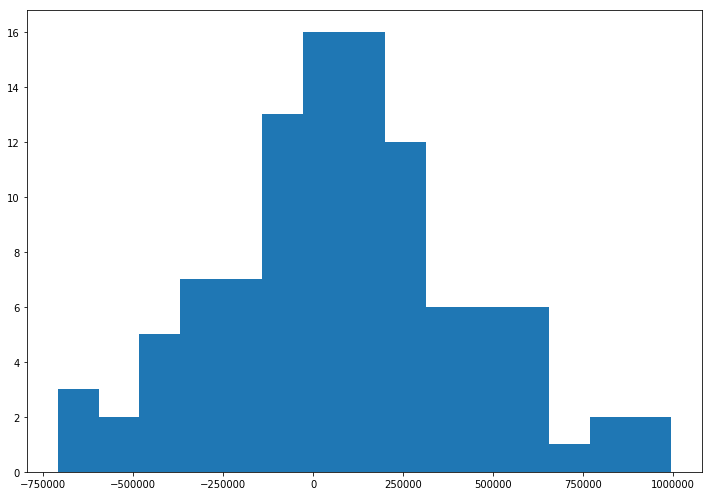

In [13]:
#Residual Analysis---Test for normality of residuals -> one of the assumption of linear regression
import scipy.stats as st

residues=(y_train)-(IPL_model.predict(X_train_))
residues=residues.sort_values()
m=residues.mean()
s=residues.std()
z=(residues-m)/s
tprob=st.norm.cdf(z)

#pf=pd.DataFrame(p)

ap=[(i-0.5)/105 for i in range(1,105)]

az=st.norm.ppf(ap)
val=m+s*az
#plt.scatter(val,residues)
fig, axs = plt.subplots(1, 1, figsize =(8, 6),tight_layout = True)

plt.plot(ap,ap)
plt.scatter(ap,tprob)

fig, axs = plt.subplots(1, 1, figsize =(10, 7),tight_layout = True)
axs.hist(residues,bins=15)


In [14]:
#Check for Transforming variables
y_train_sqrt=np.sqrt(y_train)
new_model=sm.OLS(y_train_sqrt, X_train_).fit()
new_model.summary2()


#R-squared value increased, there is a non linear relationship

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2021-01-08 20:43 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

In [15]:
#predict for test set
from sklearn import metrics
X_test_=X_test[significant_features]
y_test_pred=np.power(new_model.predict(X_test_),2)
metrics.r2_score(y_test_pred, y_test)
#r2 score for test set

0.44336065290377114

# Using Linear Regression model from Scikit Library and advanced conepts of Linear Regression


In [16]:
#No check for model assumptions
#Loss function is minimized using Gradient Descent Algorithm
#Data Normalization and Regularization is applied to the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Normalizing the data using standard scaler.
X_scaler=StandardScaler()
X_=df_updated

Y_=df['SOLD PRICE']
X_scaled = X_scaler.fit_transform(X_) #Standard Scaler transforms all feature values to their respective z values
Y = (Y_ - Y_.mean()) / Y_.std()     #Scaling of Y_values using z-score formula

X_train1, X_test1, y_train1, y_test1=train_test_split(X_scaled,Y,test_size=0.2,random_state = 42)
from sklearn.linear_model import LinearRegression
multi_linreg_model = LinearRegression() 
multi_linreg_model.fit(X_train1, y_train1)
multi_linreg_model.coef_

#Here Data is scaled on entire data, It leads to data leakage
#Test data is revealed to model in terms of mean and std deviation
#Better to fit the train and test data using train data only.

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

Text(0, 0.5, 'Features')

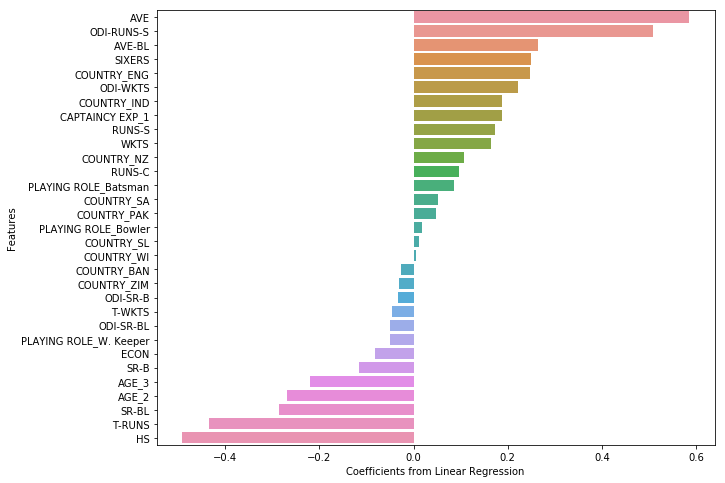

In [17]:
import seaborn as sn
columns_coef_df = pd.DataFrame( { 'columns': df_updated.columns,'coef': multi_linreg_model.coef_ } )
sorted_coef_vals = columns_coef_df.sort_values( 'coef',ascending=False)
plt.figure( figsize = ( 10, 8 )) ## Creating a bar plot
sn.barplot(x="coef", y="columns", data=sorted_coef_vals);
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")

#Insights from below fig.
#Give the details of highly influencing features
#Here AVERAGE, ODI-Runs and Sixers are the threee highly influncing features with positive coef value
#ECONOMY RATE, Bowling SR and AGE has negative effect
#The negative effect of high score and T-Runs and SR_Bat may be due to multi collinearity

In [18]:
from sklearn import metrics
def get_model_metrics(model):
    y_train_pred=model.predict(X_train1)
    RMSE_train=round(np.sqrt(metrics.mean_squared_error(y_train1,y_train_pred)),3)
    y_test_pred = model.predict( X_test1 )
    RMSE_test = round(np.sqrt(metrics.mean_squared_error(y_test1,y_test_pred)),3)
    print( "train RMSE:", RMSE_train, "test RMSE:", RMSE_test )
    R2_train = metrics.r2_score( y_train1, y_train_pred)
    print("R Squared_train: ", R2_train)
    y_test_pred=model.predict(X_test1)
    R2_test=metrics.r2_score(y_test1,y_test_pred)
    print("R_squared_test",R2_test)

get_model_metrics(multi_linreg_model)

#good model should give very similar RMSE value on both train and test sets
#r2_score should be same for both train and test data and >0.75 would be better score


train RMSE: 0.679 test RMSE: 0.749
R Squared_train:  0.5538424305356855
R_squared_test 0.3191598450075738


In [19]:
#Regularization using LASSO(Least Absolute Shrinkage and Selection Operator)
#prevents model overfitting which is caused by inflation of coefficients
#Lasso reduces some coefficients to zero which may cause model to overfit
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.02, max_iter = 100)
lasso.fit( X_train1, y_train1 )

get_model_metrics(lasso)
coef_df_lasso=pd.DataFrame( { 'columns': df_updated.columns,'coef': lasso.coef_ } )
coef_df_lasso[coef_df_lasso.coef==0]

#The columns T-WKTS,ODI-SR-B,AVE-BL,ECON,SR-BL,COUNTRY_SA,PLAYING ROLE_Bowler not influencing the auction price

train RMSE: 0.707 test RMSE: 0.675
R Squared_train:  0.5166891129201903
R_squared_test 0.446918532125548


,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
14,ECON,-0.0
15,SR-BL,-0.0
23,COUNTRY_SA,0.0
28,PLAYING ROLE_Bowler,-0.0


In [20]:
#Regularization using Ridge:
#penalty term is square of the weights and alpha is the parameter
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 5, max_iter = 500)
ridge.fit( X_train1, y_train1)

get_model_metrics(ridge)
coef_df_ridge=pd.DataFrame( { 'columns': df_updated.columns,'coef': ridge.coef_ } )
coef_df_ridge[abs(coef_df_ridge.coef)<0.02]

#with ridge regression also ODI-SR-B,COUNTRY_SA,PLAYING ROLE_Bowler not influencing the auction price

train RMSE: 0.69 test RMSE: 0.671
R Squared_train:  0.5397877148548603
R_squared_test 0.45289462756622056


,columns,coef
3,ODI-SR-B,-0.011413
23,COUNTRY_SA,0.012572
28,PLAYING ROLE_Bowler,-0.002485


In [21]:
#from OLS model the deatures which are not significant removed to improve test set r2_score

features_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S','HS', 'AVE','RUNS-C', 'SR-B', 'AVE-BL', 'ECON',
'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']
X_new_features=list(set(X_features)-set(features_to_be_removed))
#X_train_n=X_train[X_new_features]
new_X=df_updated[X_new_features]
new_X_scaled = X_scaler.fit_transform(new_X)
X_train_n, X_test_n, y_train_n, y_test_n=train_test_split(new_X_scaled,Y,test_size=0.2,random_state = 42)
from sklearn.linear_model import Ridge
ridge_new = Ridge(alpha =10, max_iter = 1000)
ridge_new.fit( X_train_n, y_train_n)

from sklearn import metrics
def model_metrics(model):
    y_train_pred=model.predict(X_train_n)
    RMSE_train=round(np.sqrt(metrics.mean_squared_error(y_train_n,y_train_pred)),3)
    y_test_pred = model.predict( X_test_n )
    RMSE_test = round(np.sqrt(metrics.mean_squared_error(y_test_n,y_test_pred)),3)
    print( "train RMSE:", RMSE_train, "test RMSE:", RMSE_test )
    R2_train = metrics.r2_score( y_train_n, y_train_pred)
    print("R Squared_train: ", R2_train)
    y_test_pred=model.predict(X_test_n)
    R2_test=metrics.r2_score(y_test_n,y_test_pred)
    print("R_squared_test",R2_test)

model_metrics(ridge_new)

train RMSE: 0.772 test RMSE: 0.615
R Squared_train:  0.4235501592200537
R_squared_test 0.54091844117653


In [22]:
from sklearn.linear_model import Lasso
lasso_new = Lasso(alpha = 0.01, max_iter = 100)
lasso_new.fit( X_train_n, y_train_n)
model_metrics(lasso_new)

train RMSE: 0.771 test RMSE: 0.632
R Squared_train:  0.4256242197495914
R_squared_test 0.5141761487514931


In [23]:
#Here test set score is increased and train score is reduced when we remove insignificant features
#model can now generalize for new data set